# Percolation At Convergence. No PM

There are to random factors:

* The order of the memories. Every agent starts with the same amount of memories of defection and cooperations, but there order is random. The memories are forgotten in a first in first out fashion. Then, if one agent has a defection memorie as the oldest one it will be forgotten and relaced by the newest one. On the contrary, if an other agent has a cooperation memory as it last one, it will forget it and it will replace it with the newest one as soon as it will observe the behavior of the other agent. This, will led to the same behavior in the first round but to a different action in the second one.
* The location of the AllD Agents on the network.

In [1]:
%matplotlib inline
from __future__ import unicode_literals
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
#number_of_nodes = G.number_of_nodes()

## Sanity check of job-pipeline

In [64]:
runs = pd.read_csv('job-pipeline-percolation2d_last_maxr_pr_vs_cd.tsv', sep='\t')
runs = runs[runs['Host']!='***REMOVED***']
runs = runs[runs['Seq']!=456]
runs = runs[runs['Seq']!=426]
runs.to_csv('job-pipeline-percolation2d_last_maxr_pr_vs_cd.tsv', sep='\t', index=False)
runs['Projection'] = runs['Command'].str[82:87].astype(float)
runs['Prior'] = runs['Command'].str[87:90].astype(int)
runs['seed'] = runs['Command'].str[97:100].str.replace('-', '').astype(int)
display(runs.query('Projection==0.5 & Prior==10 & (seed==54)'))
for name, gr in df.query('AllD==1').groupby(('Projection', 'Paranoia')):
    print(name)
    display(gr.loc[gr['isna'], 'seed'])


Seq     Host     Starttime  JobRuntime  Send  Receive  Exitval  Signal  \
760  859  ***REMOVED***  1.507500e+09      3778.7     0    22262        0       0   

                                               Command  Projection  Prior  \
760  cd ~/10-economy/the_breakdown_of_trust/;source...         0.5     10   

     seed  
760    54

(0.0, 0.0)


Series([], Name: seed, dtype: int64)

(0.0, 0.22109025670449645)


Series([], Name: seed, dtype: int64)

(0.0, 0.3555349247376467)


Series([], Name: seed, dtype: int64)

(0.0, 0.37243421061698834)


Series([], Name: seed, dtype: int64)

(0.25, 0.0)


Series([], Name: seed, dtype: int64)

(0.25, 0.22109025670449645)


Series([], Name: seed, dtype: int64)

(0.25, 0.3555349247376467)


Series([], Name: seed, dtype: int64)

(0.25, 0.37243421061698834)


Series([], Name: seed, dtype: int64)

(0.5, 0.0)


Series([], Name: seed, dtype: int64)

(0.5, 0.22109025670449645)


Series([], Name: seed, dtype: int64)

(0.5, 0.3555349247376467)


Series([], Name: seed, dtype: int64)

(0.5, 0.37243421061698834)


Series([], Name: seed, dtype: int64)

(0.75, 0.0)


Series([], Name: seed, dtype: int64)

(0.75, 0.22109025670449645)


Series([], Name: seed, dtype: int64)

(0.75, 0.3555349247376467)


Series([], Name: seed, dtype: int64)

(0.75, 0.37243421061698834)


Series([], Name: seed, dtype: int64)

## Maximum Reward

In [3]:
df = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd.pkl')
df0 = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd0.pkl')
df = pd.concat([df, df0])
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.query('Projection==0.25 & Paranoia > 0.37 & Paranoia > 0.35').head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
dtype: int64


Paranoia    0.0  0.221090256704  0.355534924738  0.372434210617   All
Projection                                                           
0.0         100             100             100             100   400
0.25        100             100             100             100   400
0.5         100             100             100             100   400
0.75        100             100             100             100   400
All         400             400             400             400  1600

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     1      0.999950  0.000050  Beta(11, 1), Paranoia 0.37  0.372434   
1   101      0.996808  0.003192  Beta(11, 1), Paranoia 0.37  0.372434   
2   201      0.993827  0.006173  Beta(11, 1), Paranoia 0.37  0.372434   
3   301      0.990198  0.009802  Beta(11, 1), Paranoia 0.37  0.372434   
4   401      0.986820  0.013180  Beta(11, 1), Paranoia 0.37  0.372434   

     Prior  Projection  Time  gigant component size  seed  \
0  (11, 1)        0.25  1999                     11    87   
1  (11, 1)        0.25  1999                     22    87   
2  (11, 1)        0.25  1999                     25    87   
3  (11, 1)        0.25  1999                     49    87   
4  (11, 1)        0.25  1999                     56    87   

   size of active nodes        f      SGC       SA   isna  
0                    11  0.00001  0.00011  0.00011  False  
1                   734  0.00101  0.00022  0.00734  False  
2                  1421  0.00201  0.00025  0.01421  False  
3                  2230  0.00301  0.00049  0.02230  False  
4                  2984  0.00401  0.00056  0.02984  False

0
0.0


(0, 1.1)

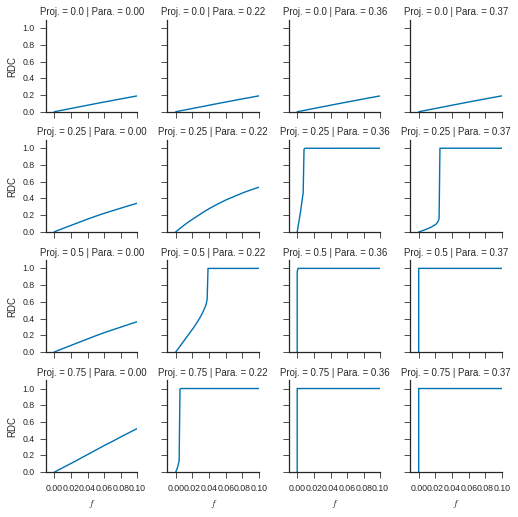

In [9]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='RDC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'RDC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

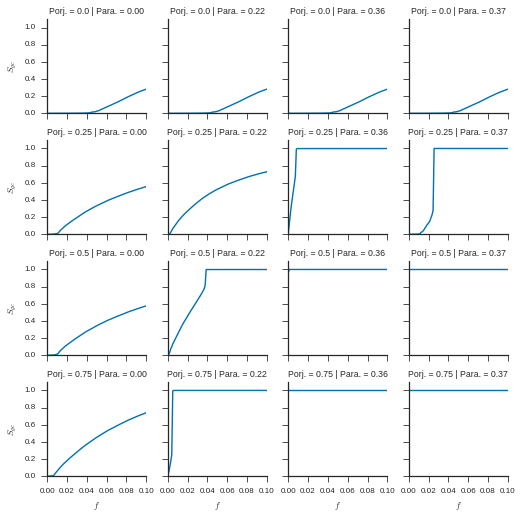

In [5]:
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), 
                  despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{gc}$')
g.axes[0,0].set_ylim([0, 1.1])
g.axes[0,0].set_xlim([0, 1.])
g.set_titles("Porj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
plt.savefig('figures/SGC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
plt.savefig('figures/SGC_vs_f_maxr_zoom.pdf')

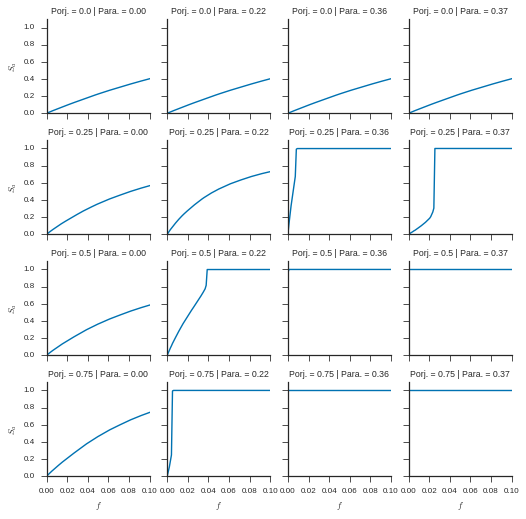

In [6]:
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1),
                  despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{a}$')
g.set_titles("Porj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
plt.savefig('figures/SA_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
plt.savefig('figures/SA_vs_f_maxr_zoom.pdf')

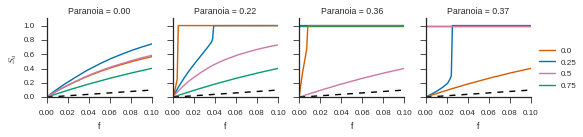

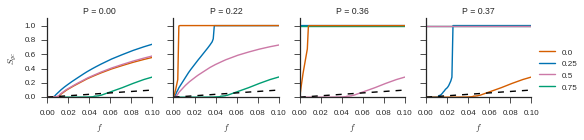

In [7]:
space=.2
current_palette = sns.color_palette('colorblind')
#current_palette = sns.color_palette()
g = sns.FacetGrid(df, col='Paranoia', col_order=sorted(df['Paranoia'].unique()), xlim=(0., 0.5),
                  ylim=(0, 1.1), despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SA', condition='Projection', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('f', '$S_a$')
g.set_titles("Paranoia = {col_name:.2f}")
g.add_legend()
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])

g.axes[0,0].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,1].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,2].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,3].plot([0, 0.5], [0, 0.5], 'k--')


plt.figure()
g = sns.FacetGrid(df, col='Paranoia',
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 0.5), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{gc}$')
g.set_titles("P = {col_name:.2f}")
g.add_legend()
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])

g.axes[0,0].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,1].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,2].plot([0, 0.5], [0, 0.5], 'k--')
g.axes[0,3].plot([0, 0.5], [0, 0.5], 'k--')


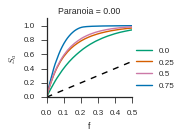

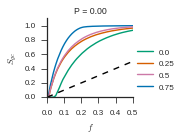

In [9]:
space=.2
current_palette = sns.color_palette('colorblind')
g = sns.FacetGrid(df.query('Paranoia<0.1'), col='Paranoia', xlim=(0., 0.5),
                  ylim=(0, 1.1), despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SA', condition='Projection', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('f', '$S_a$')
g.set_titles("Paranoia = {col_name:.2f}")
g.add_legend()
g.axes[0,0].set_xlim([0, 0.5])
g.axes[0,0].set_ylim([0, 1.1])

g.axes[0,0].plot([0, 0.5], [0, 0.5], 'k--')


plt.figure()
g = sns.FacetGrid(df.query('Paranoia<0.1'), col='Paranoia',
                  xlim=(0., 0.5), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{gc}$')
g.set_titles("P = {col_name:.2f}")
g.add_legend()
g.axes[0,0].set_xlim([0, 0.5])
g.axes[0,0].set_ylim([0, 1.1])

g.axes[0,0].plot([0, 0.5], [0, 0.5], 'k--')


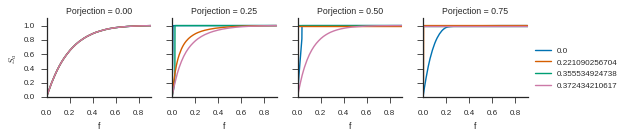

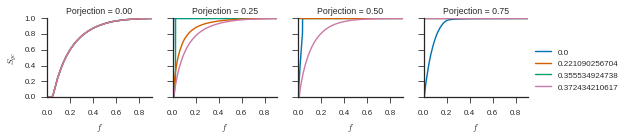

In [10]:
current_palette = sns.color_palette()
g = sns.FacetGrid(df, col='Projection',
                  col_order=sorted(df['Projection'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SA', condition='Paranoia', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('f', '$S_a$')
g.set_titles("Porjection = {col_name:.2f}")
g.add_legend()

plt.figure()
space=.2
g = sns.FacetGrid(df, col='Projection',
                  col_order=sorted(df['Projection'].unique()), xlim=(0., 1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='seed', value='SGC', condition='Paranoia', color=current_palette)
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{gc}$')
g.set_titles("Porjection = {col_name:.2f}")
g.add_legend()

# Bootstrap Percolation Analysis

In [2]:
dfmaxr = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd.pkl')
dfmaxr0 = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd0.pkl')
dfmaxr = pd.concat([dfmaxr, dfmaxr0])
#dfmaxrcoop = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd.pkl')

dfmaxr = dfmaxr.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
dfmaxr['f'] = dfmaxr['AllD'] / number_of_nodes
dfmaxr['SGC'] = dfmaxr['gigant component size'] / number_of_nodes
dfmaxr['SA'] = dfmaxr['size of active nodes'] / number_of_nodes
dfmaxr.loc[dfmaxr.SA.isnull(), 'SA'] = 0

#dfmaxrcoop = dfmaxrcoop.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
#dfmaxrcoop['f'] = dfmaxrcoop['AllD'] / number_of_nodes
#dfmaxrcoop['SGC'] = dfmaxrcoop['gigant component size'] / number_of_nodes
#dfmaxrcoop['SA'] = dfmaxrcoop['size of active nodes'] / number_of_nodes
#dfmaxrcoop.loc[dfmaxrcoop.SA.isnull(), 'SA'] = 0

[ 0.22109026  0.          0.35553492  0.37243421]


/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


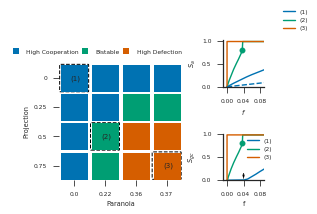

In [7]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(dfmaxr.Paranoia.unique())
subdf = dfmaxr.query('(Paranoia==0 & Projection==0) or (Projection==0.5 & Paranoia> 0.1 & Paranoia < 0.3) | (Projection==0.75 & Paranoia>0.36)')
subdf = subdf.sort_values('Projection')
# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='Projection', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette, ax=ax, legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[38, 'f'], sgc_mean.loc[38, 0.5], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='Projection', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='seed', value='SA', condition='Projection', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[38, 'f'], sa_mean.loc[38, 0.5], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(.95, 0.9), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = dfmaxr.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in dfmaxr.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, 1.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([3.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 1.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(3.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[ 0.22109026  0.          0.35553492  0.37243421]


/home/andres/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/andres/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


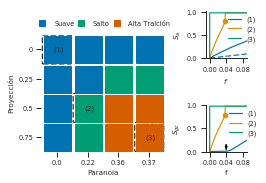

In [5]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
new_palette = [current_palette[0], current_palette[2], current_palette[3], current_palette[1]]
new_palette.extend(current_palette[4:])
sns.set_palette(new_palette)

sns.set_context("paper", font_scale=.75)
print(dfmaxr.Paranoia.unique())
subdf = dfmaxr.query('(Paranoia==0 & Projection==0) or (Projection==0.5 & Paranoia> 0.1 & Paranoia < 0.3) | (Projection==0.75 & Paranoia>0.36)')
subdf = subdf.sort_values('Projection')
#df['Proyección'] = df['Projection']
subdf['Proyección'] = subdf['Projection']
dfmaxr['Proyección'] = dfmaxr['Projection']
# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='Projection', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette, ax=ax, legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[38, 'f'], sgc_mean.loc[38, 0.5], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.96, 0.38), bbox_transform=plt.gcf().transFigure, framealpha=0, loc="upper right")
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='Proyección', values='SA').reset_index()

# top inset
ax2 = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='seed', value='SA', condition='Proyección', color=current_palette, n_boot=2, ax=ax2, legend=True)
ax2.scatter(sa_mean.loc[38, 'f'], sa_mean.loc[38, 0.5], c=current_palette[1])
ax2.set_xlim([-0.01, 0.09])
ax2.set_xlabel('$f$')
ax2.set_ylabel('$S_a$')
ax2.set_ylim([-0, 1.01])
ax2.set_xticks([0, 0.04, 0.08])
ax2.plot([0, 0.09], [0, 0.09], '--')
ax2.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(1.36, 1.03), bbox_transform=ax2.transAxes, loc="upper right", shadow=False, framealpha=0)


sns.despine()



import matplotlib.patches as mpatches
pv = dfmaxr.pivot_table(index='Proyección', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in dfmaxr.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'Alta Traición'
        else:
            pv.loc[projection, paranoia] = 'Suave'
    else:
        pv.loc[projection, paranoia] = 'Salto'
pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Proyección']))}
pepe['Proyección'] = pepe['Proyección'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['Suave', 'Salto', 'Alta Traición']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Proyección'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.5, 1.1), ncol=3, columnspacing=0, framealpha=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Proyección');

fancybox = mpatches.FancyBboxPatch([.05, 3.02], 0.9, 0.95, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, 1.02], 0.9, 0.95, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([3.05, .02], 0.9, 0.95, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 1.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(3.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_tesis.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

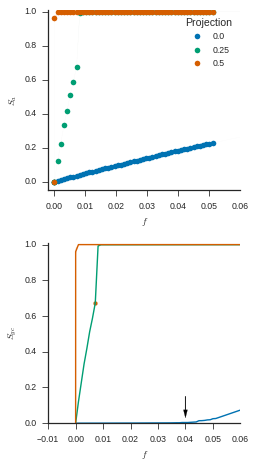

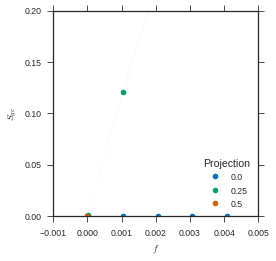

In [13]:
subdf = dfmaxr.query('Paranoia > 0.3 & Paranoia < 0.36 & Projection<0.7')
subdf = subdf.sort_values('Projection')
fig, axs = plt.subplots(2,1, figsize=(linewidthin, 1.8*linewidthin))
sa_mean = subdf.pivot_table(index='f', columns='Projection', values='SA').reset_index()

sns.tsplot(subdf, time='f', unit='seed', value='SA', condition='Projection', color=current_palette, n_boot=10, ax=axs[0], interpolate=False)
axs[0].scatter(sa_mean.loc[8, 'f'], sa_mean.loc[8, 0.25], c=current_palette[2])

axs[0].set_xlim([-0.002, 0.06])
axs[0].set_xlabel('$f$')
axs[0].set_ylabel('$S_a$')
axs[0].set_ylim([-0.05, 1.01])
#axs[0].legend(bbox_to_anchor=(0.7, 0.96), bbox_transform=plt.gcf().transFigure, title='Projection')
plt.legend
#axs[0].set_title('Paranoia=0.35')
sgc_mean = subdf.pivot_table(index='f', columns='Projection', values='SGC').reset_index()
sns.tsplot(subdf, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette, ax=axs[1], legend=False)
axs[1].annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=4, headlength=8),
            )

axs[1].scatter(sgc_mean.loc[8, 'f'], sgc_mean.loc[8, 0.25], c=current_palette[2])
axs[1].set_ylim([0, 1.01])
axs[1].set_xlim([-0.01, 0.06])
axs[1].set_xlabel('$f$')
axs[1].set_ylabel('$S_{gc}$')
sns.despine()
plt.tight_layout()
plt.savefig('figures/bootstrap_phases2.pdf')

plt.figure(3, figsize=(linewidthin, linewidthin))
sns.tsplot(subdf, time='f', unit='seed', value='SGC', condition='Projection', color=current_palette, interpolate=False)
plt.xlim([-0.001, 0.005])
plt.ylim([0, 0.2])
plt.xlabel('$f$')
plt.ylabel('$S_{gc}$')

# Stability map

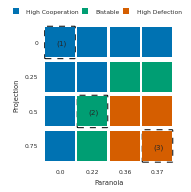

In [163]:
import matplotlib.patches as mpatches
sns.set_context("paper")
pv = dfmaxr.pivot_table(index='Projection', columns='Paranoia', values='RDC')
#pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')

for (projection, paranoia), subdf in dfmaxr.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
sns.set_context('paper', font_scale=0.75)
fig, ax0 = plt.subplots(1, 1, figsize=(0.66*linewidthin, 0.66*linewidthin*aspect))
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=30)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.4, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, 1.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([3.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 1.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(3.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
plt.tight_layout()

plt.savefig('figures/stabilitymap7.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# No PM and cooperative projection

In [2]:
df = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd.pkl')
#df = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd.pkl')

df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['Fraction of AllD'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
#print(df['SGC'].isnull().sum())
#df = df.dropna()
display(df.head())

display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))

AllD  Cooperations       RDC                 Parameters  Paranoia   Prior  \
0     1      0.999910  0.000090  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
1   101      0.985566  0.014434  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
2   201      0.972351  0.027649  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
3   301      0.957424  0.042576  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
4   401      0.944360  0.055640  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   

   Projection  Time  gigant component size  seed  size of active nodes  \
0         0.5  1999                     19    43                    19   
1         0.5  1999                    728    43                  2940   
2         0.5  1999                   3096    43                  5568   
3         0.5  1999                   7372    43                  8444   
4         0.5  1999                  10070    43                 10937   

   Fraction of AllD      SGC       SA  
0           0.00001  0.00019  0.00019  
1           0.00101  0.00728  0.02940  
2           0.00201  0.03096  0.05568  
3           0.00301  0.07372  0.08444  
4           0.00401  0.10070  0.10937

Paranoia      0.0  0.221090256704  0.355534924738  0.372434210617     All
Projection                                                               
0.0         100.0           100.0           100.0           100.0   400.0
0.25        100.0           100.0           100.0           100.0   400.0
0.5         100.0           100.0           100.0           100.0   400.0
0.75        100.0           100.0           100.0           100.0   400.0
All         400.0           400.0           400.0           400.0  1600.0

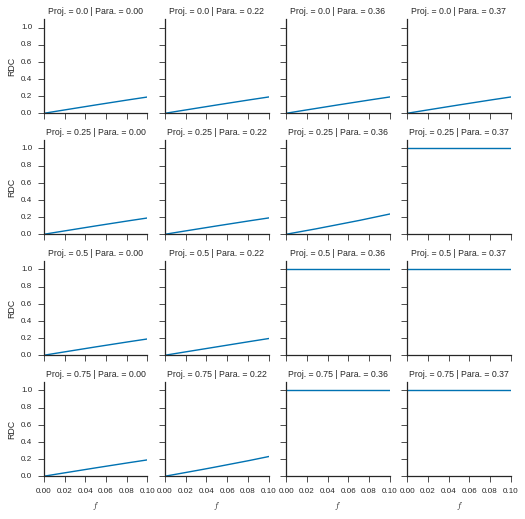

In [24]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='Fraction of AllD', unit='seed', value='RDC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'RDC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
plt.savefig('figures/RDC_vs_f_maxr_cooppr.pdf')
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
plt.savefig('figures/RDC_vs_f_maxr_cooppr_zoom.pdf')

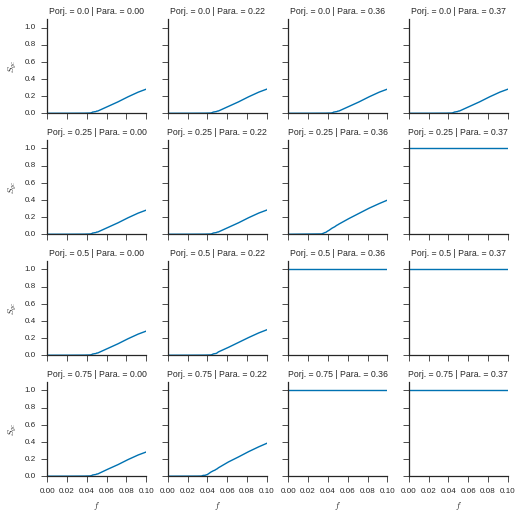

In [25]:
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), 
                  despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='Fraction of AllD', unit='seed', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{gc}$')
g.axes[0,0].set_ylim([0, 1.1])
g.axes[0,0].set_xlim([0, 1.])
g.set_titles("Porj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
plt.savefig('figures/SGC_vs_f_maxr_cooppr.pdf')
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
plt.savefig('figures/SGC_vs_f_maxr_cooppr_zoom.pdf')

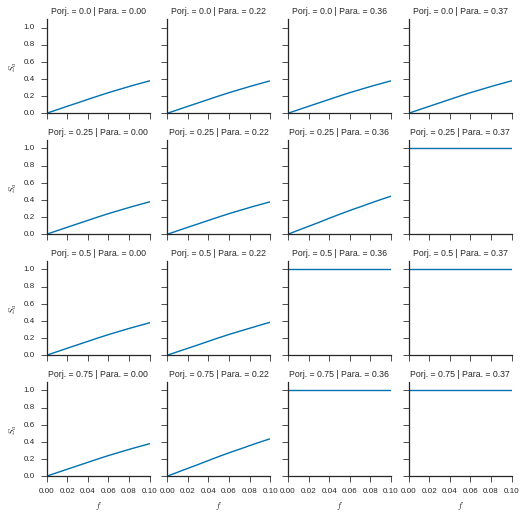

In [26]:
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1),
                  despine=True, size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='Fraction of AllD', unit='seed', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', '$S_{a}$')
g.set_titles("Porj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
plt.savefig('figures/SA_vs_f_maxr_cooppr.pdf')
g.axes[0,0].set_xlim([0, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
plt.savefig('figures/SA_vs_f_maxr_cooppr_zoom.pdf')

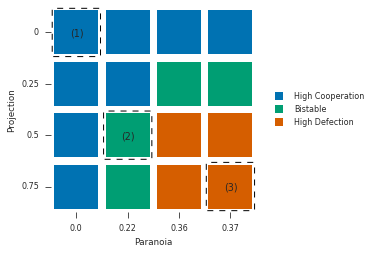

In [9]:
import matplotlib.patches as mpatches

#pv = dfmaxr.pivot_table(index='Projection', columns='Paranoia', values='RDC')
df['f'] = df['Fraction of AllD']
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
sns.set_palette('colorblind')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
fig, ax0 = plt.subplots(1,1,figsize=(linewidthin, linewidthin*aspect))
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=44)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(1.3, .5), ncol=1)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, 1.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([3.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 1.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(3.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
# plt.tight_layout()

#plt.savefig('figures/stabilitymap6.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[[0.0, 114.0, 178.0], [0.0, 158.0, 115.0], [213.0, 94.0, 0.0]]
[[76.0, 114.0, 176.0], [85.0, 168.0, 104.0], [196.0, 78.0, 82.0]]


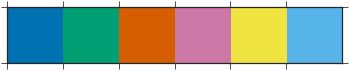

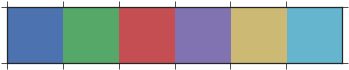

In [17]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.palplot(current_palette)
print([[x*255 for x in y] for y in current_palette[:3]])
sns.set_palette('deep')
current_palette = sns.color_palette()
sns.palplot(current_palette)
print([[x*255 for x in y] for y in current_palette[:3]])

[[1.0, 115.0, 178.0], [222.0, 143.0, 5.0], [2.0, 158.0, 115.0]]
[[1.0, 115.0, 178.0], [2.0, 158.0, 115.0], [213.0, 94.0, 0.0]]


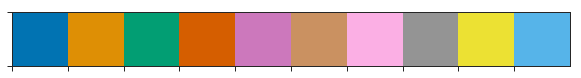

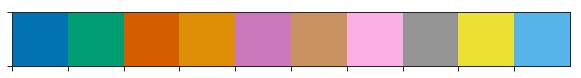

In [10]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.palplot(current_palette)
print([[x*255 for x in y] for y in current_palette[:3]])
new_palette = [current_palette[0], current_palette[2], current_palette[3], current_palette[1]]
new_palette.extend(current_palette[4:])
sns.set_palette(new_palette)
#sns.set_palette('deep')
current_palette = sns.color_palette()
sns.palplot(current_palette)
print([[x*255 for x in y] for y in current_palette[:3]])

# Projection vs AllD

In [5]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
#matplotlib.style.use('ggplot')
#sns.set_palette('colorblind')
sns.set_style("ticks")
#sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146
sns.set_style('white')
p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
#number_of_nodes = G.number_of_nodes()
print(number_of_nodes)
number_of_nodes = 100000

100000


In [6]:
#df = pd.read_pickle('data/percolation2d_last_maxr_fad_vs_cd.pkl')
df = pd.read_pickle('data/percolation2d_last_maxr_fad_vs_cd2.pkl')

#df = pd.DataFrame(pickle.load(open('data/percolation2d_last_maxr_cooppr_fad_vs_cd.pkl', 'rb')))
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['unit'] = 100 * df['seed'] + df['network_seed']
display(df[df['Projection']==0].head())
#print(df.AllD.unique())
display(df.query('f==0').pivot_table(index='seed', columns='network_seed', values='f', aggfunc=len, margins=False))

AllD  Cooperations       RDC                Parameters  Paranoia   Prior  \
0     0      1.000000  0.000000  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
1   100      0.998068  0.001932  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
2   200      0.996101  0.003899  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
3   300      0.994134  0.005866  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
4   400      0.992008  0.007992  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   

   Projection  Time  gigant component size  network_seed  seed  \
0         0.0  1999                      0             4     6   
1         0.0  1999                     13             4     6   
2         0.0  1999                     13             4     6   
3         0.0  1999                     13             4     6   
4         0.0  1999                     19             4     6   

   size of active nodes      f      SGC       SA  unit  
0                     0  0.000  0.00000  0.00000   604  
1                   486  0.001  0.00013  0.00486   604  
2                   979  0.002  0.00013  0.00979   604  
3                  1471  0.003  0.00013  0.01471   604  
4                  1991  0.004  0.00019  0.01991   604

network_seed     1     2     3     4     5
seed                                      
1             41.0  41.0  41.0  41.0  41.0
2             41.0  41.0  41.0  41.0  41.0
3             41.0  41.0  41.0  41.0  41.0
4             41.0  41.0  41.0  41.0  41.0
5             41.0  41.0  41.0  41.0  41.0
6             41.0  41.0  41.0  41.0  41.0
7             41.0  41.0  41.0  41.0  41.0
8             41.0  41.0  41.0  41.0  41.0
9             41.0  41.0  41.0  41.0  41.0
10            41.0  41.0  41.0  41.0  41.0

/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


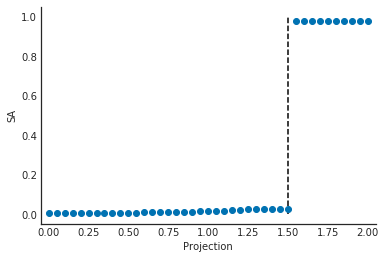

In [16]:
plt.figure(1)
pepe = df.query('AllD==100')
sns.tsplot(data=pepe, time='Projection', value='SA', unit='unit', interpolate=False)
plt.vlines(1.5, 0, 1, linestyles='dashed');
sns.despine()
#plt.savefig('figures/SA_vs_Projection_alld100.pdf')

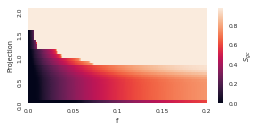

In [4]:
sns.set_context('paper', font_scale=0.75)
sns.set_palette('colorblind')
pv = df.query('f<=0.2').pivot_table(index='Projection', columns='f', values='SGC')
pv = pv.loc[pv.index[::-1]]
xtl = [x if int(1000*x) % 50==0 else '' for x in pv.columns ]
xtl[0] = '{:1.1f}'.format(pv.columns[0])
xtl[-1] = '{:1.2f}'.format(pv.columns[-1])
ytl = ['' for x in pv.index]
ytl[0] = pv.index[0]
ytl[-1] = pv.index[-1]
figsize = (linewidthin, 0.5*linewidthin)
fig = plt.figure(figsize=figsize)
g = sns.heatmap(pv, xticklabels=50, yticklabels=10, rasterized=True, cbar_kws={'label': r'$S_{gc}$'})
plt.tight_layout()
plt.savefig('figures/SGC_heatmap.pdf')


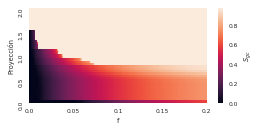

In [7]:
sns.set_context('paper', font_scale=0.75)
sns.set_palette('colorblind')
df['Proyección'] = df['Projection']
pv = df.query('f<=0.2').pivot_table(index='Proyección', columns='f', values='SGC')
pv = pv.loc[pv.index[::-1]]
xtl = [x if int(1000*x) % 50==0 else '' for x in pv.columns ]
xtl[0] = '{:1.1f}'.format(pv.columns[0])
xtl[-1] = '{:1.2f}'.format(pv.columns[-1])
ytl = ['' for x in pv.index]
ytl[0] = pv.index[0]
ytl[-1] = pv.index[-1]
figsize = (linewidthin, 0.5*linewidthin)
fig = plt.figure(figsize=figsize)
g = sns.heatmap(pv, xticklabels=50, yticklabels=10, rasterized=True, cbar_kws={'label': r'$S_{gc}$'})
plt.tight_layout()
plt.savefig('figures/SGC_heatmap_tesis.pdf')


/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


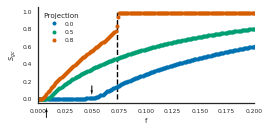

In [18]:
sns.set_context('paper', font_scale=0.75)
fig = plt.figure(figsize=(linewidthin, 0.5*linewidthin))
df['unit'] = df['seed'] + 10*df['network_seed']
temp = df.query('Projection==0 | Projection==0.5 | Projection==0.8')
temp = temp.sort_values('Projection')
ax = sns.tsplot(data=temp, time='f', value='SGC', condition='Projection', unit='unit',
                interpolate=False, markeredgewidth=0.0, markersize=4)
sns.despine()
plt.xlim([0, 0.2])
ax.annotate("", xy=(0.04, -0.05), xycoords='axes fraction', xytext=(0.04, -0.15), textcoords='axes fraction',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

ax.annotate("", xy=(0.05, 0.05), xycoords='data', xytext=(0.05, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

plt.vlines(0.073, 0, 1, linestyles='dashed')
plt.tight_layout()
plt.ylabel(r'$S_{gc}$')
plt.savefig('figures/SGC_vs_f_from_heatmap.pdf')

/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


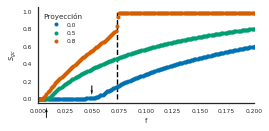

In [8]:
sns.set_context('paper', font_scale=0.75)
fig = plt.figure(figsize=(linewidthin, 0.5*linewidthin))
df['unit'] = df['seed'] + 10*df['network_seed']
df['Proyección'] = df['Projection']
temp = df.query('Projection==0 | Projection==0.5 | Projection==0.8')
temp = temp.sort_values('Projection')
ax = sns.tsplot(data=temp, time='f', value='SGC', condition='Proyección', unit='unit',
                interpolate=False, markeredgewidth=0.0, markersize=4)
sns.despine()
plt.xlim([0, 0.2])
ax.annotate("", xy=(0.04, -0.05), xycoords='axes fraction', xytext=(0.04, -0.15), textcoords='axes fraction',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

ax.annotate("", xy=(0.05, 0.05), xycoords='data', xytext=(0.05, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

plt.vlines(0.073, 0, 1, linestyles='dashed')
plt.tight_layout()
plt.ylabel(r'$S_{gc}$')
plt.savefig('figures/SGC_vs_f_from_heatmap_tesis.pdf')

/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


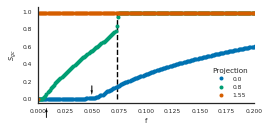

In [17]:
sns.set_context('paper', font_scale=0.75)
fig = plt.figure(figsize=(linewidthin, 0.5*linewidthin))
df['unit'] = df['seed'] + 10*df['network_seed']
temp = df.query('Projection==0 | Projection==0.8 | Projection==1.55')
temp = temp.sort_values('Projection')
ax = sns.tsplot(data=temp, time='f', value='SGC', condition='Projection', unit='unit',
                interpolate=False, markeredgewidth=0.0, markersize=4)
sns.despine()
plt.xlim([0, 0.2])
ax.annotate("", xy=(0.04, -0.05), xycoords='axes fraction', xytext=(0.04, -0.15), textcoords='axes fraction',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

ax.annotate("", xy=(0.05, 0.05), xycoords='data', xytext=(0.05, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4))

plt.vlines(0.073, 0, 1, linestyles='dashed')
plt.tight_layout()
plt.ylabel(r'$S_{gc}$')
plt.savefig('figures/SGC_vs_f_from_heatmap2.png', pdi=3000)

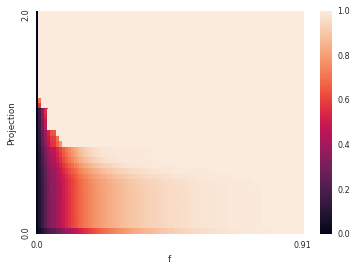

In [3]:
pv = df.query('AllD==0 | AllD==1001 | AllD==2001 | AllD==3001 | AllD==4001 | f>0.05').pivot_table(index='Projection', columns='f', values='SA')
#pv = pv.loc[:, :0.3]
#pv -= pv.loc[0, :]
pv = pv.loc[pv.index[::-1]]
xtl = ['' for x in pv.columns]
xtl[0] = '{:1.1f}'.format(pv.columns[0])
xtl[-1] = '{:1.2f}'.format(pv.columns[-1])
ytl = ['' for x in pv.index]
ytl[0] = pv.index[0]
ytl[-1] = pv.index[-1]
g = sns.heatmap(pv, xticklabels=xtl, yticklabels=ytl)
plt.savefig('SA_heatmap.pdf')

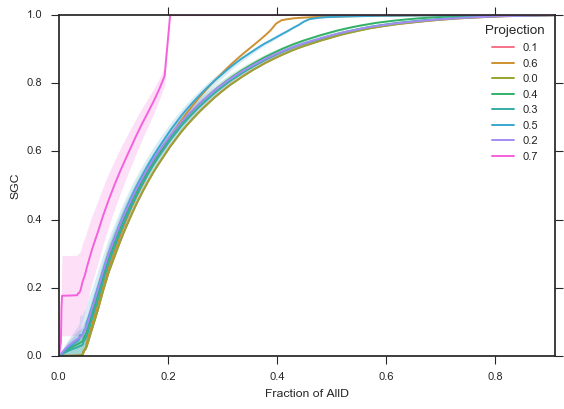

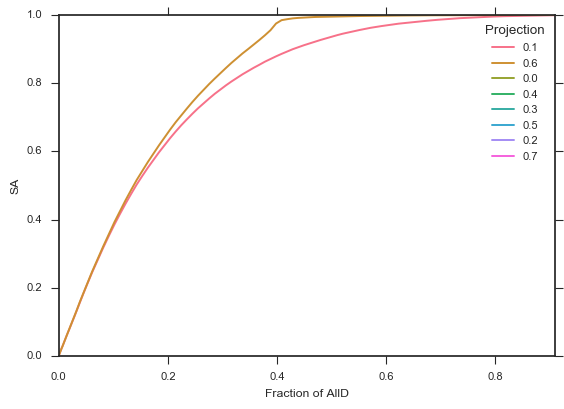

In [20]:
subdf = df.query('(Projection*100) % 10 == 0')
#g = sns.FacetGrid(subdf, hue='Projection')
#g.map_dataframe(sns.tsplot, time='Fraction of AllD', value='SGC', unit='seed')
plt.figure(0)
sns.tsplot(subdf, time='Fraction of AllD', value='SGC', unit='seed', condition='Projection')
plt.figure(1)
sns.tsplot(subdf, time='Fraction of AllD', value='SA', unit='seed', condition='Projection')

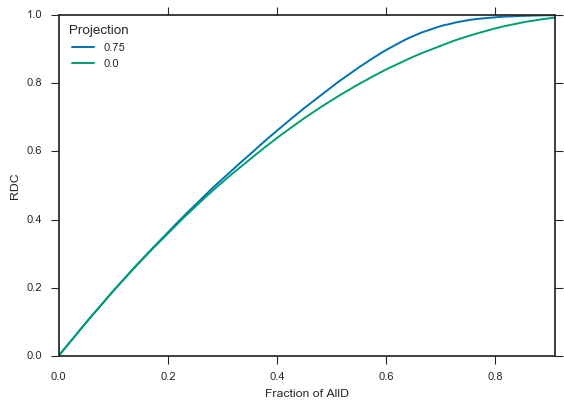

In [20]:
sns.tsplot(df[(df['Projection']==0.00) | (df['Projection']==0.75) ].dropna(), time='Fraction of AllD', unit='seed', value='RDC', condition='Projection')

In [11]:
len(df[df['Projection']==0.5].dropna())

3510

AlD  Cooperations  Defections                Parameters  Paranoia   Prior  \
0    1      0.999980    0.000020  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
1  101      0.997847    0.002153  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
2  201      0.995935    0.004065  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
3  301      0.993751    0.006249  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
4  401      0.991809    0.008191  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   

   Proyection  Time  gigant component size  seed  
0         0.2  1999                      4     1  
1         0.2  1999                     12     1  
2         0.2  1999                     12     1  
3         0.2  1999                     12     1  
4         0.2  1999                     13     1

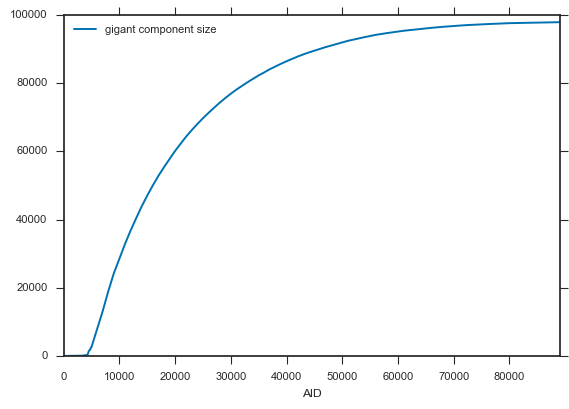

In [17]:
import pickle
d = pickle.load(open('parallel_out/seed1_nodes100000_ald-1_cog_dis0.2_prior8.pkl'))
df = pd.DataFrame(d)
display(df.head())
df.plot(x='AlD', y='gigant component size')

# One AllD

In [2]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
#matplotlib.style.use('ggplot')
#sns.set_palette('colorblind')
sns.set_style("ticks")
#sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146
sns.set_style('white')
p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
#number_of_nodes = G.number_of_nodes()
print(number_of_nodes)
number_of_nodes = 100000

100000


In [3]:
df = pd.read_pickle('data/percolation2d_last_maxr_onefad_vs_cd.pkl')
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['unit'] = 100 * df['seed'] + df['network_seed']
display(df[df['Projection']==0].head())
#print(df.AllD.unique())
display(df.pivot_table(index='seed', columns='network_seed', values='f', aggfunc=len, margins=False))

AllD  Cooperations       RDC                Parameters  Paranoia   Prior  \
0     1      0.999980  0.000020  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
0     1      0.999990  0.000010  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
0     1      0.999990  0.000010  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
0     1      0.999995  0.000005  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   
0     1      0.999985  0.000015  Beta(8, 4), Paranoia 0.0       0.0  (8, 4)   

   Projection  Time  gigant component size  network_seed  seed  \
0         0.0  1999                      5             1     9   
0         0.0  1999                      3             4    10   
0         0.0  1999                      3             4     1   
0         0.0  1999                      2             2    10   
0         0.0  1999                      4             5     5   

   size of active nodes        f      SGC       SA  unit  
0                     5  0.00001  0.00005  0.00005   901  
0                     3  0.00001  0.00003  0.00003  1004  
0                     3  0.00001  0.00003  0.00003   104  
0                     2  0.00001  0.00002  0.00002  1002  
0                     4  0.00001  0.00004  0.00004   505

network_seed     1     2     3     4     5
seed                                      
1             41.0  41.0  41.0  41.0  41.0
2             41.0  41.0  41.0  41.0  41.0
3             41.0  41.0  41.0  41.0  41.0
4             41.0  41.0  41.0  41.0  41.0
5             41.0  41.0  41.0  41.0  41.0
6             41.0  41.0  41.0  41.0  41.0
7             41.0  41.0  41.0  41.0  41.0
8             41.0  41.0  41.0  41.0  41.0
9             41.0  41.0  41.0  41.0  41.0
10            41.0  41.0  41.0  41.0  41.0

(3.68153, 1.840765)


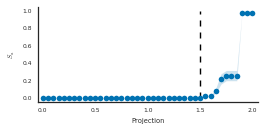

In [73]:
sns.set_context('paper', font_scale=0.75)
fig_size = (linewidthin, 0.5*linewidthin)
fig = plt.figure(figsize=fig_size)
ax = sns.tsplot(df, time='Projection', value='SA', unit='unit', interpolate=False)
#fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
plt.ylim([-0.05, 1.05])
plt.ylabel('$S_a$')
plt.vlines(1.5, 0, 1, linestyles='dashed')
sns.despine()
plt.tight_layout()
plt.savefig('figures/SA_vs_Projection_alld1.pdf')

/home/andres/miniconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(3.68153, 1.840765)


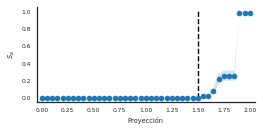

In [4]:
sns.set_context('paper', font_scale=0.75)
fig_size = (linewidthin, 0.5*linewidthin)
fig = plt.figure(figsize=fig_size)
df['Proyección'] = df['Projection']
ax = sns.tsplot(df, time='Proyección', value='SA', unit='unit', interpolate=False)
#fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
plt.ylim([-0.05, 1.05])
plt.ylabel('$S_a$')
plt.vlines(1.5, 0, 1, linestyles='dashed')
sns.despine()
plt.tight_layout()
plt.savefig('figures/SA_vs_Projection_alld1_tesis.pdf')